Data Quality Report:
Duplicates in account_id: 63
Nulls:
account_id           0
balance             11
transaction_date     0
transaction_type     0
amount               0
customer_age         0
junk_field           0
dtype: int64
Outliers in balance: 1
Outliers in amount: 11
Junk data in transaction_type: 0
Summary: {'total_rows': 1000, 'total_columns': 7, 'data_types': {'account_id': dtype('int32'), 'balance': dtype('float64'), 'transaction_date': dtype('<M8[ns]'), 'transaction_type': dtype('O'), 'amount': dtype('float64'), 'customer_age': dtype('int32'), 'junk_field': dtype('O')}, 'unique_values': {'account_id': 937, 'balance': 984, 'transaction_date': 1000, 'transaction_type': 3, 'amount': 962, 'customer_age': 62, 'junk_field': 5}, 'range': {'account_id': (np.int32(1004), np.int32(9996)), 'balance': (np.float64(0.0), np.float64(11386.215135689723)), 'amount': (np.float64(0.0), np.float64(100000.0)), 'customer_age': (np.int32(18), np.int32(79))}}
Count Check: {'source_rows': 1000, '

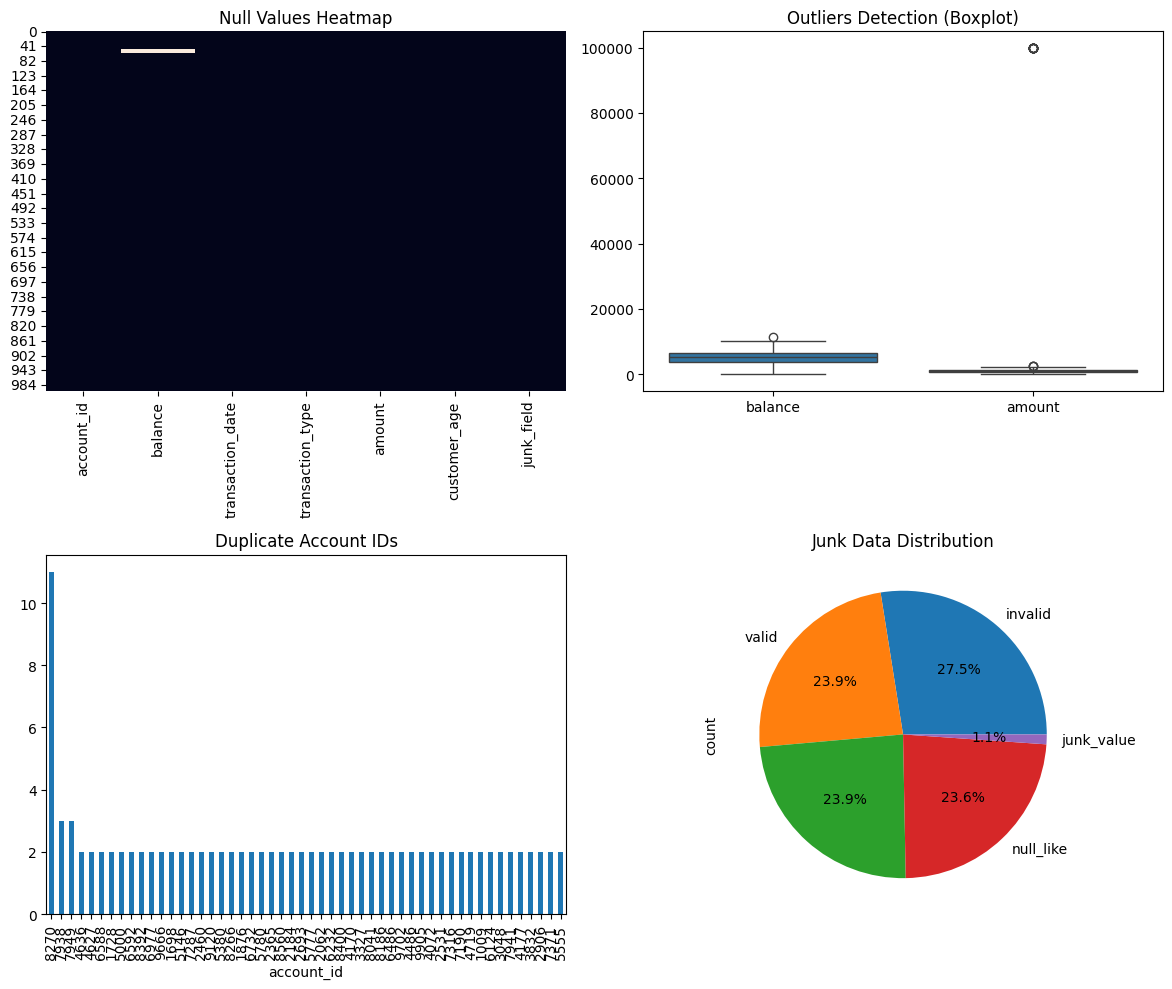

Data exported to 'banking_data_profiled.csv' for Power BI dashboard.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

# Generate sample banking data (source)
np.random.seed(42)
data = {
    'account_id': np.random.randint(1000, 9999, 1000),
    'balance': np.random.normal(5000, 2000, 1000).clip(0),
    'transaction_date': pd.date_range('2020-01-01', periods=1000, freq='D'),
    'transaction_type': np.random.choice(['deposit', 'withdrawal', 'transfer'], 1000),
    'amount': np.random.normal(1000, 500, 1000).clip(0),
    'customer_age': np.random.randint(18, 80, 1000),
    'junk_field': np.random.choice(['valid', 'invalid', 'null_like', ''], 1000)  # Simulate junk data
}
df_source = pd.DataFrame(data)

# Introduce some duplicates, nulls, outliers, junk
df_source.loc[0:10, 'account_id'] = df_source.loc[0, 'account_id']  # Duplicates
df_source.loc[50:60, 'balance'] = np.nan  # Nulls
df_source.loc[100:110, 'amount'] = 100000  # Outliers
df_source.loc[200:210, 'junk_field'] = 'junk_value'  # Junk

# Simulate target data (e.g., after processing, remove some rows)
df_target = df_source.sample(frac=0.9, random_state=42).reset_index(drop=True)

# Data Profiling Functions
def check_duplicates(df, column):
    return df[column].duplicated().sum()

def check_nulls(df):
    return df.isnull().sum()

def detect_outliers(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[column].dropna()))
    return (z_scores > threshold).sum()

def check_junk_data(df, column, valid_values):
    return df[~df[column].isin(valid_values)].shape[0]

def data_quality_summary(df):
    summary = {
        'total_rows': len(df),
        'total_columns': len(df.columns),
        'data_types': df.dtypes.to_dict(),
        'unique_values': df.nunique().to_dict(),
        'range': {col: (df[col].min(), df[col].max()) for col in df.select_dtypes(include=[np.number]).columns}
    }
    return summary

# Count check: Compare row counts
count_check = {
    'source_rows': len(df_source),
    'target_rows': len(df_target),
    'difference': len(df_source) - len(df_target)
}

# Content check: Compare means or key metrics
content_check = {
    'source_balance_mean': df_source['balance'].mean(),
    'target_balance_mean': df_target['balance'].mean(),
    'source_amount_mean': df_source['amount'].mean(),
    'target_amount_mean': df_target['amount'].mean()
}

# Perform checks
duplicates = check_duplicates(df_source, 'account_id')
nulls = check_nulls(df_source)
outliers_balance = detect_outliers(df_source, 'balance')
outliers_amount = detect_outliers(df_source, 'amount')
junk = check_junk_data(df_source, 'transaction_type', ['deposit', 'withdrawal', 'transfer'])
summary = data_quality_summary(df_source)

# Print results
print("Data Quality Report:")
print(f"Duplicates in account_id: {duplicates}")
print(f"Nulls:\n{nulls}")
print(f"Outliers in balance: {outliers_balance}")
print(f"Outliers in amount: {outliers_amount}")
print(f"Junk data in transaction_type: {junk}")
print(f"Summary: {summary}")
print(f"Count Check: {count_check}")
print(f"Content Check: {content_check}")

# Visualizations for Dashboard
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Nulls heatmap
sns.heatmap(df_source.isnull(), cbar=False, ax=axes[0,0])
axes[0,0].set_title('Null Values Heatmap')

# Outliers boxplot
sns.boxplot(data=df_source[['balance', 'amount']], ax=axes[0,1])
axes[0,1].set_title('Outliers Detection (Boxplot)')

# Duplicates bar
dup_counts = df_source['account_id'].value_counts()
dup_counts[dup_counts > 1].plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Duplicate Account IDs')

# Junk data pie
junk_counts = df_source['junk_field'].value_counts()
junk_counts.plot(kind='pie', ax=axes[1,1], autopct='%1.1f%%')
axes[1,1].set_title('Junk Data Distribution')

plt.tight_layout()
plt.show()

# Export to CSV for Power BI
df_source.to_csv('banking_data_profiled.csv', index=False)
print("Data exported to 'banking_data_profiled.csv' for Power BI dashboard.")

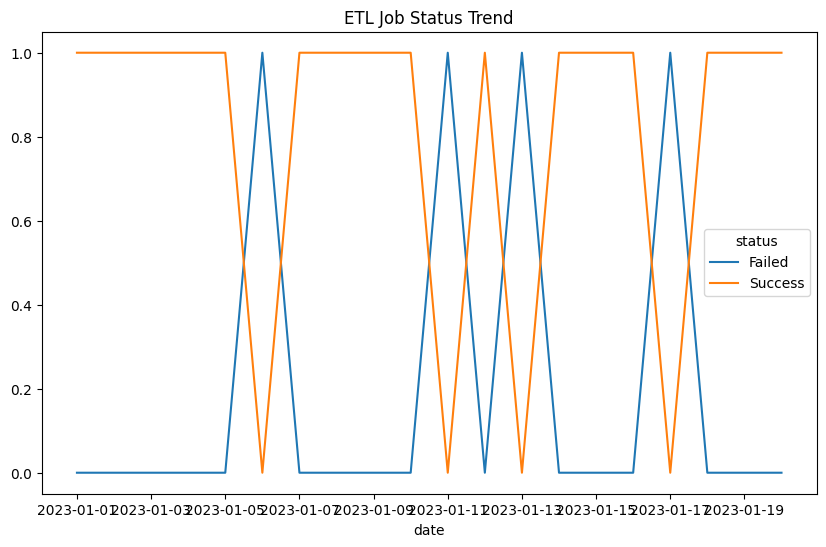

Data prepared and exported for Power BI dashboard.
Summary Metrics: {'total_etl_jobs': 20, 'failed_jobs_today': 0, 'failure_rate': np.float64(0.2), 'avg_dq_score': np.float64(0.9832718253968254), 'impacted_tables': 10}


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

# Assuming df_source and df_target are already defined from previous cells

# Function to calculate Data Quality Score (weighted combination of completeness, validity, uniqueness, consistency)
def calculate_dq_score(df, weights={'completeness': 0.25, 'validity': 0.25, 'uniqueness': 0.25, 'consistency': 0.25}):
    completeness = 1 - df.isnull().sum().sum() / (df.shape[0] * df.shape[1])
    validity = 1 - (check_junk_data(df, 'transaction_type', ['deposit', 'withdrawal', 'transfer']) / len(df))
    uniqueness = 1 - (check_duplicates(df, 'account_id') / len(df))
    consistency = 1 - (detect_outliers(df, 'balance') + detect_outliers(df, 'amount')) / (2 * len(df))
    score = (completeness * weights['completeness'] +
             validity * weights['validity'] +
             uniqueness * weights['uniqueness'] +
             consistency * weights['consistency'])
    return score

# Simulate ETL job data (since not present in sample)
np.random.seed(42)
etl_jobs = pd.DataFrame({
    'job_id': range(1, 21),
    'job_name': [f'ETL_Job_{i}' for i in range(1, 21)],
    'system': np.random.choice(['Core Banking', 'Payments', 'Loans'], 20),
    'domain': np.random.choice(['Customer', 'Accounts', 'Transactions'], 20),
    'environment': np.random.choice(['prod', 'test', 'dev'], 20),
    'criticality': np.random.choice(['High', 'Medium', 'Low'], 20),
    'status': np.random.choice(['Success', 'Failed'], 20, p=[0.8, 0.2]),
    'last_run_time': pd.date_range('2023-01-01', periods=20, freq='D'),
    'run_duration': np.random.normal(30, 10, 20).clip(10),
    'sla_breach': np.random.choice([True, False], 20, p=[0.1, 0.9]),
    'affected_records': np.random.randint(0, 10000, 20),
    'failure_rate': np.random.uniform(0, 0.2, 20)
})

# Simulate upstream/downstream tables
upstream_tables = pd.DataFrame({
    'table_id': range(1, 11),
    'table_name': [f'Upstream_Table_{i}' for i in range(1, 11)],
    'record_count': np.random.randint(1000, 10000, 10),
    'dq_score': np.random.uniform(0.7, 1.0, 10),
    'schema_changes': np.random.choice([0, 1], 10),
    'anomalies': np.random.choice(['None', 'Null Spike', 'Outlier Surge'], 10)
})

downstream_tables = pd.DataFrame({
    'table_id': range(11, 21),
    'table_name': [f'Downstream_Table_{i}' for i in range(11, 21)],
    'record_count': np.random.randint(1000, 10000, 10),
    'dq_score': np.random.uniform(0.7, 1.0, 10),
    'dependency_depth': np.random.randint(1, 5, 10),
    'impacted_kpis': np.random.randint(0, 10, 10)
})

# Calculate DQ scores for source and target
dq_source = calculate_dq_score(df_source)
dq_target = calculate_dq_score(df_target)

# Aggregate metrics for dashboard
summary_metrics = {
    'total_etl_jobs': len(etl_jobs),
    'failed_jobs_today': etl_jobs[(etl_jobs['status'] == 'Failed') & (etl_jobs['last_run_time'] >= pd.Timestamp.today().normalize())].shape[0],
    'failure_rate': etl_jobs['status'].value_counts(normalize=True).get('Failed', 0),
    'avg_dq_score': (dq_source + dq_target) / 2,
    'impacted_tables': len(downstream_tables)
}

# Export data to CSVs for Power BI import
etl_jobs.to_csv('etl_jobs.csv', index=False)
upstream_tables.to_csv('upstream_tables.csv', index=False)
downstream_tables.to_csv('downstream_tables.csv', index=False)
df_source.to_csv('source_data.csv', index=False)
df_target.to_csv('target_data.csv', index=False)

# Additional visualization: ETL Job Status Trend (for dashboard prep)
etl_jobs['date'] = etl_jobs['last_run_time'].dt.date
status_trend = etl_jobs.groupby(['date', 'status']).size().unstack().fillna(0)
status_trend.plot(kind='line', figsize=(10, 6), title='ETL Job Status Trend')
plt.show()

print("Data prepared and exported for Power BI dashboard.")
print(f"Summary Metrics: {summary_metrics}")